The purpose of the following code was to use the datasets generated over all previous notebooks to calculate the media and public agenda metrics. Furthermore, additional calculations and visualisations are created in this notebook.
Parts of this code were generated with the help of ChatGPT and altered to fit the requirements of this project.

This notebook is split into three sections:
1. Generating the metrics
2. Correlation calculations
3. Additional caluculations

In [1]:
# reading all final data frame versions for both outlets
import pandas as pd
from pathlib import Path

BILD_public_path = Path(r"D:\Users\mague\Desktop\Uni\Bachelor Arbeit\Code\Datasets\Scraped Comments\BILD_comments_final.csv")
BILD_media_path = Path(r"D:\Users\mague\Desktop\Uni\Bachelor Arbeit\Code\All Python Scripts used\Datasets used\BILD_final.csv")
DW_public_path = Path(r"D:\Users\mague\Desktop\Uni\Bachelor Arbeit\Code\Datasets\Scraped Comments\DW_comments_final.csv")
DW_media_path = Path(r"D:\Users\mague\Desktop\Uni\Bachelor Arbeit\Code\All Python Scripts used\Datasets used\DW_final.csv")

BILD_public = pd.read_csv(BILD_public_path, encoding="utf-8")
BILD_media = pd.read_csv(BILD_media_path, encoding="utf-8")
DW_public = pd.read_csv(DW_public_path, encoding="utf-8")
DW_media = pd.read_csv(DW_media_path, encoding="utf-8")


D:\Users\mague\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Users\mague\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\Users\mague\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"



==================================== 1. Generating the metrics =======================================


In [2]:
# making sure that all data frames cover the same time period

def drop_edge_months(df):
    return df[
        # drop everything before 2020 and after 2023
        (df["published_at"].dt.year >= 2020) &
        (df["published_at"].dt.year <= 2023) &

        # drop January 2020 and December 2023
        ~(
            ((df["published_at"].dt.year == 2020) & (df["published_at"].dt.month == 1)) |
            ((df["published_at"].dt.year == 2023) & (df["published_at"].dt.month == 12))
        )
    ].reset_index(drop=True)

BILD_public["published_at"] = pd.to_datetime(BILD_public["published_at"], utc=True)
DW_public["published_at"] = pd.to_datetime(DW_public["published_at"], utc=True)
BILD_media["published_at"] = pd.to_datetime(BILD_media["published_at"], utc=True)
DW_media["published_at"] = pd.to_datetime(DW_media["published_at"], utc=True)

BILD_public = drop_edge_months(BILD_public)
DW_public = drop_edge_months(DW_public)
BILD_media = drop_edge_months(BILD_media)
DW_media = drop_edge_months(DW_media)

print(len(BILD_public))
print(len(BILD_media))
print(len(DW_public))
print(len(DW_media))

6397565
13547
617227
2893


In [3]:
DW_media

,video_id,video_url,title,description,published_at,view_count,like_count,comment_count,video_length,hashtags,text,classified topic,sentiment_label,sentiment_score
0,0M0krPGPrHA,https://www.youtube.com/watch?v=0M0krPGPrHA,Kontroverse um Russland bei OSZE-Treffen | DW ...,Das Minister-Treffen der Organisation für Sich...,2023-11-30 22:00:00+00:00,25164,373,378,381,"['#osze', '#russland', '#lavrov']",Kontroverse um Russland bei OSZE-Treffen | DW ...,Politics,neutral,0.669398
1,RgskkBvW5Dw,https://www.youtube.com/watch?v=RgskkBvW5Dw,Auftakt der Weltklimakonferenz in Dubai | DW N...,2023 dürfte nach UN-Angaben das wärmste Jahr s...,2023-11-30 21:15:01+00:00,1573,30,13,423,"['#weltklimakonferenz', '#cop28']",Auftakt der Weltklimakonferenz in Dubai | DW N...,Politics,neutral,0.807837
2,lmvNF3u3pfQ,https://www.youtube.com/watch?v=lmvNF3u3pfQ,Liberale Imamin Seyran Ates wird von konservat...,Antisemitische Ausschreitungen auf Berlins Str...,2023-11-30 20:45:01+00:00,25871,1021,435,1502,[],Liberale Imamin Seyran Ates wird von konservat...,Politics,negative,0.654454
3,HRxDJVCAO48,https://www.youtube.com/watch?v=HRxDJVCAO48,Drei Tote bei Attentat in Jerusalem | DW Nachr...,Hoffnung und Entsetzen liegen in Israel gerade...,2023-11-30 20:13:07+00:00,8327,122,89,451,[],Drei Tote bei Attentat in Jerusalem | DW Nachr...,Media / Culture,negative,0.578731
4,T7DITxbjWSk,https://www.youtube.com/watch?v=T7DITxbjWSk,Steht die Insolvenz für eine allgemeine Krise ...,Der Immobilien- und Warenhauskonzern Signa des...,2023-11-30 11:45:02+00:00,151699,805,211,341,"['#signa', '#insolvenz', '#benko']",Steht die Insolvenz für eine allgemeine Krise ...,Economy,neutral,0.547005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,rb26yacJ85U,https://www.youtube.com/watch?v=rb26yacJ85U,Ex-FDP-Minister Niebel zur Skandal-Wahl in Thü...,Ex-FDP-Bundesminister Dirk Niebel hat die Mini...,2020-02-06 16:49:26+00:00,308898,8759,1984,425,"['#Kemmerich', '#Thüringen', '#FDP']",Ex-FDP-Minister Niebel zur Skandal-Wahl in Thü...,Politics,neutral,0.468606
2889,ZLuTo8aX_yE,https://www.youtube.com/watch?v=ZLuTo8aX_yE,Was hat Trump in der Außenpolitik bisher errei...,Er führt freundschaftliche Gespräche mit autor...,2020-02-05 17:00:07+00:00,14649,93,71,301,['#Trump'],Was hat Trump in der Außenpolitik bisher errei...,Politics,negative,0.484094
2890,CYWtXp3Hg4g,https://www.youtube.com/watch?v=CYWtXp3Hg4g,App löst Chaos bei US-Vorwahlen in Iowa aus | ...,Die Demokratische Partei wollte einen starken ...,2020-02-05 08:57:44+00:00,1429,26,5,260,[],App löst Chaos bei US-Vorwahlen in Iowa aus | ...,Politics,neutral,0.549075
2891,QuBDIafkjac,https://www.youtube.com/watch?v=QuBDIafkjac,Coronavirus: DW spricht mit Rückkehrer in Quar...,Mehr als 17.200 Personen haben sich mittlerwei...,2020-02-04 10:59:30+00:00,52310,410,178,465,['#Coronavirus'],Coronavirus: DW spricht mit Rückkehrer in Quar...,Health / Medicine,neutral,0.542835


In [4]:
DW_public

,video_id,video_url,comment_id,parent_id,text,like_count,published_at,sentiment_label,sentiment_score
0,0M0krPGPrHA,https://www.youtube.com/watch?v=0M0krPGPrHA,UgxFe42-xm860vTtjAd4AaABAg,NaN,Russen noch zu mögen fällt echt schwer. Ruzzen...,39,2023-11-30 23:57:56+00:00,negative,0.893759
1,0M0krPGPrHA,https://www.youtube.com/watch?v=0M0krPGPrHA,UgzLCmQhfbY7uKkn1SF4AaABAg,NaN,Lawrow und OSZE.... ein ruschistischer Bock al...,1,2023-11-30 23:46:31+00:00,positive,0.429745
2,0M0krPGPrHA,https://www.youtube.com/watch?v=0M0krPGPrHA,UgyTyExZRY22g6utc054AaABAg,NaN,"Сергей Лавров, сила мозг, Русь святая на веки ...",19,2023-11-30 23:38:03+00:00,positive,0.489790
3,0M0krPGPrHA,https://www.youtube.com/watch?v=0M0krPGPrHA,Ugxa0YxF8Vs7nMyMwXR4AaABAg,NaN,Die müssen wieder miteinander sprechen ! Im Kr...,31,2023-11-30 23:31:37+00:00,negative,0.923982
4,0M0krPGPrHA,https://www.youtube.com/watch?v=0M0krPGPrHA,Ugxa0YxF8Vs7nMyMwXR4AaABAg.9xkzSp7HdR09xkzmqnpN4N,Ugxa0YxF8Vs7nMyMwXR4AaABAg,Na dann sag das doch mal dem russischen Lügenk...,21,2023-11-30 23:34:29+00:00,negative,0.763753
...,...,...,...,...,...,...,...,...,...
617222,Ei5lEmXff3k,https://www.youtube.com/watch?v=Ei5lEmXff3k,Ugx-4WsXN1JoM2fTc894AaABAg.94LggR_ytHu94b4us0RIGL,Ugx-4WsXN1JoM2fTc894AaABAg,Es ist auch Panikmache... Wie damals mit der V...,0,2020-02-04 05:57:31+00:00,negative,0.871784
617223,Ei5lEmXff3k,https://www.youtube.com/watch?v=Ei5lEmXff3k,Ugw7iGrze0PSOebZtwh4AaABAg.94LdfbqNi0v9518sZOztuO,Ugw7iGrze0PSOebZtwh4AaABAg,XxXxX 123 ja voll unhygienisch auch.. von eine...,0,2020-02-14 18:11:39+00:00,negative,0.818943
617224,Ei5lEmXff3k,https://www.youtube.com/watch?v=Ei5lEmXff3k,UgzmkeU9kjDMq27cq1N4AaABAg.94LMiFDAJjL94qoHdVWXQK,UgzmkeU9kjDMq27cq1N4AaABAg,Nicht bei den Chinesen,0,2020-02-10 08:31:20+00:00,negative,0.547844
617225,Ei5lEmXff3k,https://www.youtube.com/watch?v=Ei5lEmXff3k,Ugw0TR4mYgVhxnKDvy54AaABAg.94LMLf5dE0y96hH7w4gQzM,Ugw0TR4mYgVhxnKDvy54AaABAg,Ja einfach nur ja,0,2020-03-27 08:42:32+00:00,neutral,0.448088


In [5]:
# linking public and media datasets in order to get the classified topics for the comments

DW_media["video_url"] = DW_media["video_url"].astype(str).str.strip()
DW_public["video_url"] = DW_public["video_url"].astype(str).str.strip()

BILD_media["video_url"] = BILD_media["video_url"].astype(str).str.strip()
BILD_public["video_url"] = BILD_public["video_url"].astype(str).str.strip()

DW_public = DW_public.merge(
    DW_media[["video_url", "classified topic"]],
    on="video_url",
    how="left"
)

BILD_public = BILD_public.merge(
    BILD_media[["video_url", "classified topic"]],
    on="video_url",
    how="left"
)

print(DW_public[["video_url", "classified topic"]].head())
print(BILD_public[["video_url", "classified topic"]].head())


                                     video_url classified topic
0  https://www.youtube.com/watch?v=0M0krPGPrHA         Politics
1  https://www.youtube.com/watch?v=0M0krPGPrHA         Politics
2  https://www.youtube.com/watch?v=0M0krPGPrHA         Politics
3  https://www.youtube.com/watch?v=0M0krPGPrHA         Politics
4  https://www.youtube.com/watch?v=0M0krPGPrHA         Politics
                                     video_url classified topic
0  https://www.youtube.com/watch?v=Jf7BcLknC1I         Politics
1  https://www.youtube.com/watch?v=Jf7BcLknC1I         Politics
2  https://www.youtube.com/watch?v=Jf7BcLknC1I         Politics
3  https://www.youtube.com/watch?v=Jf7BcLknC1I         Politics
4  https://www.youtube.com/watch?v=Jf7BcLknC1I         Politics


In [6]:
import pandas as pd

def compute_monthly_public_topic_metrics(df, start_year=2020, end_year=2023):
    df = df.copy()

    # ensure datetime (timezone-safe)
    df["published_at"] = pd.to_datetime(df["published_at"], utc=True)

    # extract year and month
    df["year"] = df["published_at"].dt.year
    df["month"] = df["published_at"].dt.to_period("M").astype(str)

    # restrict to analysis years
    df = df[df["year"].between(start_year, end_year)]

    # Topic Sentiment
    sentiment_map = {
        "positive": 1,
        "neutral": 0,
        "negative": -1
    }

    df["sentiment_numeric"] = df["sentiment_label"].map(sentiment_map)

    topic_sentiment = (
        df
        .groupby(["year", "month", "classified topic"])["sentiment_numeric"]
        .mean()
        .reset_index(name="topic_sentiment")
    )

    # Reply-Ratio
    df["is_reply"] = df["parent_id"].notna() & (df["parent_id"].astype(str).str.strip() != "")

    replies = (
        df
        .groupby(["year", "month", "classified topic"])["is_reply"]
        .sum()
        .reset_index(name="reply_count")
    )

    comments_total = (
        df
        .groupby(["year", "month", "classified topic"])
        .size()
        .reset_index(name="total_comments")
    )

    reply_ratio = replies.merge(comments_total, on=["year", "month", "classified topic"])
    reply_ratio["reply_ratio"] = reply_ratio["reply_count"] / reply_ratio["total_comments"]

    # merging the metrics into one table
    monthly_metrics = (
        topic_sentiment
        .merge(
            reply_ratio[["year", "month", "classified topic", "reply_ratio"]],
            on=["year", "month", "classified topic"],
            how="left"
        )
    )

    return monthly_metrics

In [7]:
import pandas as pd

def compute_monthly_media_topic_metrics(df, start_year=2020, end_year=2023):
    df = df.copy()

    # extract year and month
    df["year"] = df["published_at"].dt.year
    df["month"] = df["published_at"].dt.to_period("M").astype(str)

    # restrict to analysis years
    df = df[df["year"].between(start_year, end_year)]

    # Topic Sentiment
    sentiment_map = {
        "positive": 1,
        "neutral": 0,
        "negative": -1
    }

    df["sentiment_numeric"] = df["sentiment_label"].map(sentiment_map)

    topic_sentiment = (
        df
        .groupby(["year", "month", "classified topic"])["sentiment_numeric"]
        .mean()
        .reset_index(name="topic_sentiment")
    )

    # Topic Frequency
    freq = (
        df
        .groupby(["year", "month", "classified topic"])
        .size()
        .reset_index(name="video_count")
    )

    monthly_video_totals = (
        df
        .groupby(["year", "month"])
        .size()
        .reset_index(name="total_videos")
    )

    freq = freq.merge(monthly_video_totals, on=["year", "month"])
    freq["topic_frequency"] = freq["video_count"] / freq["total_videos"]

    # Topic Duration
    duration = (
        df
        .groupby(["year", "month", "classified topic"])["video_length"]
        .sum()
        .reset_index(name="topic_duration_seconds")
    )

    monthly_duration_totals = (
        df
        .groupby(["year", "month"])["video_length"]
        .sum()
        .reset_index(name="total_duration_seconds")
    )

    duration = duration.merge(
        monthly_duration_totals,
        on=["year", "month"]
    )

    duration["topic_duration"] = (
        duration["topic_duration_seconds"] /
        duration["total_duration_seconds"]
    )

    # Comment Share

    topic_comments = (
        df
        .groupby(["year", "month", "classified topic"])["comment_count"]
        .sum()
        .reset_index(name="topic_comments")
    )

    monthly_comment_totals = (
        df
        .groupby(["year", "month"])["comment_count"]
        .sum()
        .reset_index(name="total_comments")
    )

    topic_comments = topic_comments.merge(monthly_comment_totals, on=["year", "month"])
    topic_comments["comment_share"] = topic_comments["topic_comments"] / topic_comments["total_comments"]

    # Like Share
    topic_likes = (
        df
        .groupby(["year", "month", "classified topic"])["like_count"]
        .sum()
        .reset_index(name="topic_likes")
    )

    monthly_like_totals = (
        df
        .groupby(["year", "month"])["like_count"]
        .sum()
        .reset_index(name="total_likes")
    )

    topic_likes = topic_likes.merge(monthly_like_totals, on=["year", "month"])
    topic_likes["like_share"] = topic_likes["topic_likes"] / topic_likes["total_likes"]

    # View Share

    topic_views = (
        df
        .groupby(["year", "month", "classified topic"])["view_count"]
        .sum()
        .reset_index(name="topic_views")
    )

    monthly_view_totals = (
        df
        .groupby(["year", "month"])["view_count"]
        .sum()
        .reset_index(name="total_views")
    )

    topic_views = topic_views.merge(monthly_view_totals, on=["year", "month"])
    topic_views["view_share"] = topic_views["topic_views"] / topic_views["total_views"]

    # merging the metrics into one table
    monthly_metrics = (
        freq
        .merge(
            duration[["year", "month", "classified topic", "topic_duration"]],
            on=["year", "month", "classified topic"]
        )
        .merge(
            topic_sentiment,
            on=["year", "month", "classified topic"],
            how="left"
        )
        .merge(
            topic_comments[["year", "month", "classified topic", "comment_share"]],
            on=["year", "month", "classified topic"],
            how="left"
        )
        .merge(
            topic_likes[["year", "month", "classified topic", "like_share"]],
            on=["year", "month", "classified topic"],
            how="left"
        )
        .merge(
            topic_views[["year", "month", "classified topic", "view_share"]],
            on=["year", "month", "classified topic"],
            how="left"
        )
    )

    return monthly_metrics

In [8]:
BILD_public_monthly_metrics = compute_monthly_public_topic_metrics(BILD_public)
DW_public_monthly_metrics = compute_monthly_public_topic_metrics(DW_public)

BILD_media_monthly_metrics = compute_monthly_media_topic_metrics(BILD_media)
DW_media_monthly_metrics = compute_monthly_media_topic_metrics(DW_media)

<ipython-input-6-bc7decd86e69>:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["published_at"].dt.to_period("M").astype(str)
<ipython-input-6-bc7decd86e69>:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["published_at"].dt.to_period("M").astype(str)
<ipython-input-7-ed63ae4456f5>:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["published_at"].dt.to_period("M").astype(str)
<ipython-input-7-ed63ae4456f5>:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["published_at"].dt.to_period("M").astype(str)


In [9]:
BILD_public_monthly_metrics

,year,month,classified topic,topic_sentiment,reply_ratio
0,2020,2020-02,Cars / Transportation,-0.424534,0.381289
1,2020,2020-02,Economy,-0.364094,0.367450
2,2020,2020-02,Health / Medicine,-0.466926,0.409857
3,2020,2020-02,Internet,-0.154639,0.505155
4,2020,2020-02,Media / Culture,-0.148766,0.330887
...,...,...,...,...,...
583,2023,2023-11,Panorama,-0.434884,0.265919
584,2023,2023-11,Politics,-0.497419,0.496743
585,2023,2023-11,Social Issues,-0.588235,0.088235
586,2023,2023-11,Sports,-0.583333,0.250000


In [10]:
BILD_media_monthly_metrics

,year,month,classified topic,video_count,total_videos,topic_frequency,topic_duration,topic_sentiment,comment_share,like_share,view_share
0,2020,2020-02,Cars / Transportation,13,158,0.082278,0.023392,-0.692308,0.102744,0.067004,0.071279
1,2020,2020-02,Economy,2,158,0.012658,0.006262,-0.500000,0.014834,0.013403,0.016260
2,2020,2020-02,Health / Medicine,4,158,0.025316,0.032024,-0.500000,0.024923,0.017796,0.014576
3,2020,2020-02,Internet,2,158,0.012658,0.006418,-0.500000,0.002405,0.001330,0.002007
4,2020,2020-02,Media / Culture,25,158,0.158228,0.355510,0.080000,0.040982,0.072034,0.089494
...,...,...,...,...,...,...,...,...,...,...,...
487,2023,2023-11,Environment,1,146,0.006849,0.004254,0.000000,0.007820,0.005985,0.004016
488,2023,2023-11,Media / Culture,4,146,0.027397,0.022324,-0.500000,0.034879,0.014122,0.014687
489,2023,2023-11,Panorama,68,146,0.465753,0.199584,-0.720588,0.195656,0.201050,0.292359
490,2023,2023-11,Politics,48,146,0.328767,0.686528,-0.416667,0.719273,0.699558,0.515720


In [11]:
# merging public and media tables per outlet

# rename topic sentiment columns to avoid confusion
BILD_media_monthly_metrics = BILD_media_monthly_metrics.rename(
    columns={"topic_sentiment": "topic_sentiment (media)"}
)

BILD_public_monthly_metrics = BILD_public_monthly_metrics.rename(
    columns={"topic_sentiment": "topic_sentiment (public)"}
)

# merge on year, month, classified topic
BILD_combined_metrics = (
    BILD_media_monthly_metrics
    .merge(
        BILD_public_monthly_metrics,
        on=["year", "month", "classified topic"],
        how="inner"
    )
)

print(BILD_combined_metrics.shape)
print(BILD_combined_metrics.head())

(492, 13)
   year    month       classified topic  video_count  total_videos  \
0  2020  2020-02  Cars / Transportation           13           158   
1  2020  2020-02                Economy            2           158   
2  2020  2020-02      Health / Medicine            4           158   
3  2020  2020-02               Internet            2           158   
4  2020  2020-02        Media / Culture           25           158   

   topic_frequency  topic_duration  topic_sentiment (media)  comment_share  \
0         0.082278        0.023392                -0.692308       0.102744   
1         0.012658        0.006262                -0.500000       0.014834   
2         0.025316        0.032024                -0.500000       0.024923   
3         0.012658        0.006418                -0.500000       0.002405   
4         0.158228        0.355510                 0.080000       0.040982   

   like_share  view_share  topic_sentiment (public)  reply_ratio  
0    0.067004    0.071279        

In [12]:
DW_media_monthly_metrics = DW_media_monthly_metrics.rename(
    columns={"topic_sentiment": "topic_sentiment (media)"}
)
DW_public_monthly_metrics = DW_public_monthly_metrics.rename(
    columns={"topic_sentiment": "topic_sentiment (public)"}
)
DW_combined_metrics = (
    DW_media_monthly_metrics
    .merge(
        DW_public_monthly_metrics,
        on=["year", "month", "classified topic"],
        how="inner"
    )
)

print(DW_combined_metrics.shape)
print(DW_combined_metrics.head())

(328, 13)
   year    month   classified topic  video_count  total_videos  \
0  2020  2020-02  Health / Medicine            6            19   
1  2020  2020-02    Media / Culture            2            19   
2  2020  2020-02           Panorama            2            19   
3  2020  2020-02           Politics            9            19   
4  2020  2020-03            Economy            1            32   

   topic_frequency  topic_duration  topic_sentiment (media)  comment_share  \
0         0.315789        0.318166                -0.500000       0.336427   
1         0.105263        0.130231                -1.000000       0.158855   
2         0.105263        0.085300                -0.500000       0.002359   
3         0.473684        0.466302                -0.333333       0.502359   
4         0.031250        0.017034                -1.000000       0.011780   

   like_share  view_share  topic_sentiment (public)  reply_ratio  
0    0.181805    0.325102                 -0.519971     0

In [13]:
# Calculating yearly averages BILD's metric

# =========================================================
# 1) calculating year averages of BILD's media metrics
# =========================================================
bild_public = BILD_combined_metrics.copy()

bild_public["date"] = pd.to_datetime(bild_public["month"], format="%Y-%m", errors="coerce")
bild_public = bild_public.dropna(subset=["date"])
bild_public["year"] = bild_public["date"].dt.year

BILD_yearly_avg_public = (
    bild_public
    .groupby(["year", "classified topic"], as_index=False)
    .agg(
        avg_comment_share=("comment_share", "mean"),
        avg_like_share=("like_share", "mean"),
        avg_view_share=("view_share", "mean"),
        avg_reply_ratio=("reply_ratio", "mean"),
        avg_topic_sentiment_public=("topic_sentiment (public)", "mean")
    )
)

# =========================================================
# 2) calculating year averages of BILD's media metrics
# =========================================================
bild_media = BILD_combined_metrics.copy()

bild_media["date"] = pd.to_datetime(bild_media["month"], format="%Y-%m", errors="coerce")
bild_media = bild_media.dropna(subset=["date"])
bild_media["year"] = bild_media["date"].dt.year

BILD_yearly_avg_media = (
    bild_media
    .groupby(["year", "classified topic"], as_index=False)
    .agg(
        avg_topic_frequency=("topic_frequency", "mean"),
        avg_topic_duration=("topic_duration", "mean"),
        avg_topic_sentiment_media=("topic_sentiment (media)", "mean")
    )
)

# =========================================================
# 3) establishing logic for yearly matrix for each metric
# =========================================================
def build_yearly_matrix(yearly_df, monthly_df, value_col_yearly, value_col_monthly, title):
    m = yearly_df.pivot(index="classified topic", columns="year", values=value_col_yearly)

    total = (
        monthly_df
        .groupby("classified topic")[value_col_monthly]
        .mean()
    )

    m["Total Ø (2020–2023)"] = total

    m = (
        m.sort_values(by="Total Ø (2020–2023)", ascending=False)
         .round(2)
    )

    print(title)
    return m

# =========================================================
# 4) Public matrices
# =========================================================
BILD_comment_share_matrix = build_yearly_matrix(
    BILD_yearly_avg_public, BILD_combined_metrics,
    "avg_comment_share", "comment_share",
    "Average Monthly Comment Share (BILD)"
)

BILD_like_share_matrix = build_yearly_matrix(
    BILD_yearly_avg_public, BILD_combined_metrics,
    "avg_like_share", "like_share",
    "Average Monthly Like Share (BILD)"
)

BILD_view_share_matrix = build_yearly_matrix(
    BILD_yearly_avg_public, BILD_combined_metrics,
    "avg_view_share", "view_share",
    "Average Monthly View Share (BILD)"
)

BILD_reply_ratio_matrix = build_yearly_matrix(
    BILD_yearly_avg_public, BILD_combined_metrics,
    "avg_reply_ratio", "reply_ratio",
    "Average Monthly Reply Ratio (BILD)"
)

BILD_public_sentiment_matrix = build_yearly_matrix(
    BILD_yearly_avg_public, BILD_combined_metrics,
    "avg_topic_sentiment_public", "topic_sentiment (public)",
    "Average Monthly Topic Sentiment (Public) (BILD)"
)

# =========================================================
# 5) Media matrices
# =========================================================
BILD_frequency_matrix = build_yearly_matrix(
    BILD_yearly_avg_media, BILD_combined_metrics,
    "avg_topic_frequency", "topic_frequency",
    "Average Monthly Topic Frequency (BILD)"
)

BILD_duration_matrix = build_yearly_matrix(
    BILD_yearly_avg_media, BILD_combined_metrics,
    "avg_topic_duration", "topic_duration",
    "Average Monthly Topic Duration (BILD)"
)

BILD_sentiment_matrix = build_yearly_matrix(
    BILD_yearly_avg_media, BILD_combined_metrics,
    "avg_topic_sentiment_media", "topic_sentiment (media)",
    "Average Monthly Topic Sentiment (Media) (BILD)"
)


Average Monthly Comment Share (BILD)
Average Monthly Like Share (BILD)
Average Monthly View Share (BILD)
Average Monthly Reply Ratio (BILD)
Average Monthly Topic Sentiment (Public) (BILD)
Average Monthly Topic Frequency (BILD)
Average Monthly Topic Duration (BILD)
Average Monthly Topic Sentiment (Media) (BILD)


In [14]:
from IPython.display import display

print("BILD – Media Agenda: Topic Frequency")
display(BILD_frequency_matrix)

print("BILD – Media Agenda: Topic Duration")
display(BILD_duration_matrix)

print("BILD – Media Agenda: Topic Sentiment (Media)")
display(BILD_sentiment_matrix)


BILD – Media Agenda: Topic Frequency


year,2020,2021,2022,2023,Total Ø (2020–2023)
classified topic,,,,,
Panorama,0.47,0.48,0.33,0.50,0.44
Politics,0.20,0.26,0.42,0.26,0.29
Media / Culture,0.10,0.08,0.13,0.08,0.10
Cars / Transportation,0.05,0.06,0.04,0.06,0.05
Health / Medicine,0.06,0.05,0.02,0.01,0.04
Tourism / Vacations,0.04,0.02,0.02,0.04,0.03
Economy,0.04,0.02,0.02,0.02,0.02
Environment,0.01,0.01,0.02,0.03,0.02
Sports,0.02,0.01,0.01,0.01,0.01


BILD – Media Agenda: Topic Duration


year,2020,2021,2022,2023,Total Ø (2020–2023)
classified topic,,,,,
Politics,0.26,0.43,0.49,0.43,0.41
Panorama,0.38,0.31,0.20,0.32,0.30
Media / Culture,0.14,0.12,0.20,0.14,0.15
Health / Medicine,0.08,0.05,0.03,0.01,0.05
Economy,0.05,0.02,0.02,0.02,0.03
Cars / Transportation,0.02,0.03,0.02,0.03,0.03
Tourism / Vacations,0.04,0.01,0.01,0.02,0.02
Environment,0.00,0.01,0.02,0.02,0.01
Sports,0.01,0.02,0.01,0.00,0.01


BILD – Media Agenda: Topic Sentiment (Media)


year,2020,2021,2022,2023,Total Ø (2020–2023)
classified topic,,,,,
Internet,-0.05,-0.08,-0.33,-0.25,-0.13
Knowledge / Education,-0.14,-0.17,-0.10,-0.22,-0.15
Economy,-0.29,-0.21,-0.42,-0.23,-0.29
Media / Culture,-0.18,-0.33,-0.33,-0.39,-0.31
Sports,0.04,-0.35,-0.50,-0.75,-0.32
Health / Medicine,-0.36,-0.40,-0.33,-0.40,-0.37
Politics,-0.32,-0.40,-0.39,-0.41,-0.38
Social Issues,-0.42,-0.50,-0.34,-0.30,-0.40
Environment,-0.46,-0.27,-0.44,-0.48,-0.42


In [15]:
BILD_duration_matrix

year,2020,2021,2022,2023,Total Ø (2020–2023)
classified topic,,,,,
Politics,0.26,0.43,0.49,0.43,0.41
Panorama,0.38,0.31,0.20,0.32,0.30
Media / Culture,0.14,0.12,0.20,0.14,0.15
Health / Medicine,0.08,0.05,0.03,0.01,0.05
Economy,0.05,0.02,0.02,0.02,0.03
Cars / Transportation,0.02,0.03,0.02,0.03,0.03
Tourism / Vacations,0.04,0.01,0.01,0.02,0.02
Environment,0.00,0.01,0.02,0.02,0.01
Sports,0.01,0.02,0.01,0.00,0.01


In [16]:
print("BILD – Public Agenda: Comment Share")
display(BILD_comment_share_matrix)

print("BILD – Public Agenda: Like Share")
display(BILD_like_share_matrix)

print("BILD – Public Agenda: View Share")
display(BILD_view_share_matrix)

print("BILD – Public Agenda: Reply Ratio")
display(BILD_reply_ratio_matrix)

print("BILD – Public Agenda: Topic Sentiment (Public)")
display(BILD_public_sentiment_matrix)


BILD – Public Agenda: Comment Share


year,2020,2021,2022,2023,Total Ø (2020–2023)
classified topic,,,,,
Politics,0.24,0.35,0.54,0.48,0.41
Panorama,0.54,0.40,0.19,0.28,0.35
Media / Culture,0.07,0.10,0.15,0.07,0.10
Cars / Transportation,0.05,0.05,0.02,0.05,0.05
Health / Medicine,0.04,0.04,0.04,0.01,0.04
Environment,0.00,0.01,0.02,0.09,0.03
Economy,0.02,0.02,0.01,0.01,0.02
Tourism / Vacations,0.02,0.01,0.01,0.01,0.01
Construction / Real Estate,0.00,0.01,0.01,0.00,0.01


BILD – Public Agenda: Like Share


year,2020,2021,2022,2023,Total Ø (2020–2023)
classified topic,,,,,
Panorama,0.66,0.50,0.21,0.38,0.43
Politics,0.12,0.24,0.46,0.33,0.29
Media / Culture,0.08,0.11,0.20,0.09,0.12
Cars / Transportation,0.06,0.07,0.03,0.08,0.06
Environment,0.00,0.01,0.02,0.09,0.04
Health / Medicine,0.03,0.03,0.05,0.01,0.03
Economy,0.02,0.02,0.01,0.01,0.02
Tourism / Vacations,0.02,0.01,0.01,0.01,0.01
Construction / Real Estate,0.01,0.01,0.01,0.01,0.01


BILD – Public Agenda: View Share


year,2020,2021,2022,2023,Total Ø (2020–2023)
classified topic,,,,,
Panorama,0.64,0.51,0.29,0.43,0.47
Politics,0.13,0.22,0.44,0.30,0.28
Media / Culture,0.07,0.09,0.14,0.07,0.09
Cars / Transportation,0.06,0.08,0.04,0.08,0.07
Environment,0.00,0.01,0.02,0.07,0.03
Health / Medicine,0.02,0.03,0.03,0.01,0.03
Tourism / Vacations,0.02,0.02,0.02,0.04,0.02
Economy,0.02,0.01,0.01,0.01,0.01
Construction / Real Estate,0.01,0.01,0.01,0.01,0.01


BILD – Public Agenda: Reply Ratio


year,2020,2021,2022,2023,Total Ø (2020–2023)
classified topic,,,,,
Politics,0.33,0.27,0.31,0.45,0.34
Internet,0.39,0.27,0.31,0.37,0.33
Tourism / Vacations,0.32,0.31,0.35,0.33,0.33
Knowledge / Education,0.31,0.28,0.42,0.37,0.33
Social Issues,0.29,0.30,0.33,0.36,0.31
Panorama,0.31,0.27,0.33,0.31,0.30
Sports,0.27,0.29,0.32,0.37,0.30
Cars / Transportation,0.34,0.32,0.27,0.23,0.29
Economy,0.31,0.24,0.29,0.33,0.29


BILD – Public Agenda: Topic Sentiment (Public)


year,2020,2021,2022,2023,Total Ø (2020–2023)
classified topic,,,,,
Internet,-0.34,-0.36,-0.32,-0.36,-0.34
Tourism / Vacations,-0.38,-0.36,-0.39,-0.40,-0.38
Construction / Real Estate,-0.39,-0.37,-0.44,-0.41,-0.39
Knowledge / Education,-0.35,-0.43,-0.39,-0.44,-0.39
Sports,-0.34,-0.44,-0.50,-0.45,-0.43
Economy,-0.35,-0.44,-0.51,-0.42,-0.43
Social Issues,-0.51,-0.34,-0.41,-0.49,-0.44
Environment,-0.43,-0.38,-0.53,-0.43,-0.45
Cars / Transportation,-0.43,-0.44,-0.48,-0.45,-0.45


In [17]:
# Calculating yearly averages DW's metric

# =========================================================
# 1) calculating yearly averages of DW's public metrics
# =========================================================
dw_public = DW_combined_metrics.copy()

dw_public["date"] = pd.to_datetime(dw_public["month"], format="%Y-%m", errors="coerce")
dw_public = dw_public.dropna(subset=["date"])
dw_public["year"] = dw_public["date"].dt.year

DW_yearly_avg_public = (
    dw_public
    .groupby(["year", "classified topic"], as_index=False)
    .agg(
        avg_comment_share=("comment_share", "mean"),
        avg_like_share=("like_share", "mean"),
        avg_view_share=("view_share", "mean"),
        avg_reply_ratio=("reply_ratio", "mean"),
        avg_topic_sentiment_public=("topic_sentiment (public)", "mean")
    )
)

# =========================================================
# 2) calculating yearly averages of DW's media metrics
# =========================================================
dw_media = DW_combined_metrics.copy()

dw_media["date"] = pd.to_datetime(dw_media["month"], format="%Y-%m", errors="coerce")
dw_media = dw_media.dropna(subset=["date"])
dw_media["year"] = dw_media["date"].dt.year

DW_yearly_avg_media = (
    dw_media
    .groupby(["year", "classified topic"], as_index=False)
    .agg(
        avg_topic_frequency=("topic_frequency", "mean"),
        avg_topic_duration=("topic_duration", "mean"),
        avg_topic_sentiment_media=("topic_sentiment (media)", "mean")
    )
)

# =========================================================
# 3) establishing logic for yearly matrix for each metric
# =========================================================
def build_yearly_matrix(yearly_df, monthly_df, value_col_yearly, value_col_monthly, title):
    m = yearly_df.pivot(index="classified topic", columns="year", values=value_col_yearly)

    total = (
        monthly_df
        .groupby("classified topic")[value_col_monthly]
        .mean()
    )

    m["Total Ø (2020–2023)"] = total

    m = (
        m.sort_values(by="Total Ø (2020–2023)", ascending=False)
         .round(2)
    )

    print(title)
    return m

# =========================================================
# 4) public matrices
# =========================================================
DW_comment_share_matrix = build_yearly_matrix(
    DW_yearly_avg_public, DW_combined_metrics,
    "avg_comment_share", "comment_share",
    "Average Monthly Comment Share (DW)"
)

DW_like_share_matrix = build_yearly_matrix(
    DW_yearly_avg_public, DW_combined_metrics,
    "avg_like_share", "like_share",
    "Average Monthly Like Share (DW)"
)

DW_view_share_matrix = build_yearly_matrix(
    DW_yearly_avg_public, DW_combined_metrics,
    "avg_view_share", "view_share",
    "Average Monthly View Share (DW)"
)

DW_reply_ratio_matrix = build_yearly_matrix(
    DW_yearly_avg_public, DW_combined_metrics,
    "avg_reply_ratio", "reply_ratio",
    "Average Monthly Reply Ratio (DW)"
)

DW_public_sentiment_matrix = build_yearly_matrix(
    DW_yearly_avg_public, DW_combined_metrics,
    "avg_topic_sentiment_public", "topic_sentiment (public)",
    "Average Monthly Topic Sentiment (Public) (DW)"
)

# =========================================================
# 5) media matrices
# =========================================================
DW_frequency_matrix = build_yearly_matrix(
    DW_yearly_avg_media, DW_combined_metrics,
    "avg_topic_frequency", "topic_frequency",
    "Average Monthly Topic Frequency (DW)"
)

DW_duration_matrix = build_yearly_matrix(
    DW_yearly_avg_media, DW_combined_metrics,
    "avg_topic_duration", "topic_duration",
    "Average Monthly Topic Duration (DW)"
)

DW_sentiment_matrix = build_yearly_matrix(
    DW_yearly_avg_media, DW_combined_metrics,
    "avg_topic_sentiment_media", "topic_sentiment (media)",
    "Average Monthly Topic Sentiment (Media) (DW)"
)


Average Monthly Comment Share (DW)
Average Monthly Like Share (DW)
Average Monthly View Share (DW)
Average Monthly Reply Ratio (DW)
Average Monthly Topic Sentiment (Public) (DW)
Average Monthly Topic Frequency (DW)
Average Monthly Topic Duration (DW)
Average Monthly Topic Sentiment (Media) (DW)


In [18]:
print("DW – Media Agenda: Topic Frequency")
display(DW_frequency_matrix)

print("DW – Media Agenda: Topic Duration")
display(DW_duration_matrix)

print("DW – Media Agenda: Topic Sentiment (Media)")
display(DW_sentiment_matrix)


DW – Media Agenda: Topic Frequency


year,2020,2021,2022,2023,Total Ø (2020–2023)
classified topic,,,,,
Politics,0.49,0.51,0.71,0.71,0.61
Panorama,0.13,0.12,0.07,0.10,0.11
Media / Culture,0.08,0.13,0.09,0.10,0.10
Internet,0.29,0.02,0.01,0.02,0.09
Health / Medicine,0.14,0.10,0.04,0.03,0.09
Economy,0.04,0.06,0.04,0.03,0.04
Sports,0.03,0.04,0.05,0.04,0.04
Environment,0.03,0.03,0.04,0.02,0.03
Tourism / Vacations,0.05,0.02,0.01,NaN,0.03


DW – Media Agenda: Topic Duration


year,2020,2021,2022,2023,Total Ø (2020–2023)
classified topic,,,,,
Politics,0.49,0.47,0.69,0.71,0.59
Media / Culture,0.11,0.17,0.08,0.11,0.12
Internet,0.33,0.02,0.02,0.05,0.11
Panorama,0.11,0.12,0.06,0.08,0.09
Health / Medicine,0.12,0.10,0.06,0.05,0.09
Economy,0.03,0.07,0.05,0.03,0.05
Tourism / Vacations,0.06,0.01,0.01,NaN,0.03
Sports,0.03,0.03,0.04,0.04,0.03
Environment,0.02,0.02,0.04,0.02,0.03


DW – Media Agenda: Topic Sentiment (Media)


year,2020,2021,2022,2023,Total Ø (2020–2023)
classified topic,,,,,
Internet,0.00,-0.25,0.00,0.00,-0.09
Knowledge / Education,0.00,0.00,0.00,-0.50,-0.09
Tourism / Vacations,-0.07,-0.14,0.00,NaN,-0.10
Cars / Transportation,-1.00,-0.10,-0.25,-0.25,-0.25
Health / Medicine,-0.25,-0.33,-0.52,-0.19,-0.34
Sports,-0.42,-0.28,-0.47,-0.20,-0.34
Economy,-0.64,-0.33,-0.37,-0.11,-0.35
Politics,-0.39,-0.34,-0.38,-0.38,-0.37
Media / Culture,-0.41,-0.37,-0.34,-0.50,-0.40


In [19]:
print("DW – Public Agenda: Comment Share")
display(DW_comment_share_matrix)

print("DW – Public Agenda: Like Share")
display(DW_like_share_matrix)

print("DW – Public Agenda: View Share")
display(DW_view_share_matrix)

print("DW – Public Agenda: Reply Ratio")
display(DW_reply_ratio_matrix)

print("DW – Public Agenda: Topic Sentiment (Public)")
display(DW_public_sentiment_matrix)


DW – Public Agenda: Comment Share


year,2020,2021,2022,2023,Total Ø (2020–2023)
classified topic,,,,,
Politics,0.50,0.57,0.85,0.81,0.68
Media / Culture,0.13,0.10,0.06,0.10,0.10
Internet,0.31,0.00,0.00,0.01,0.09
Health / Medicine,0.17,0.10,0.01,0.02,0.09
Panorama,0.08,0.12,0.04,0.04,0.07
Economy,0.02,0.07,0.02,0.01,0.03
Tourism / Vacations,0.03,0.01,0.01,NaN,0.02
Sports,0.01,0.02,0.03,0.03,0.02
Environment,0.02,0.01,0.02,0.02,0.02


DW – Public Agenda: Like Share


year,2020,2021,2022,2023,Total Ø (2020–2023)
classified topic,,,,,
Politics,0.45,0.51,0.76,0.74,0.62
Media / Culture,0.21,0.13,0.11,0.12,0.14
Internet,0.33,0.01,0.01,0.01,0.10
Panorama,0.10,0.16,0.05,0.08,0.10
Health / Medicine,0.11,0.09,0.02,0.02,0.07
Economy,0.03,0.07,0.04,0.03,0.04
Tourism / Vacations,0.02,0.01,0.04,NaN,0.02
Environment,0.03,0.01,0.02,0.02,0.02
Sports,0.01,0.02,0.01,0.01,0.01


DW – Public Agenda: View Share


year,2020,2021,2022,2023,Total Ø (2020–2023)
classified topic,,,,,
Politics,0.42,0.49,0.79,0.73,0.61
Media / Culture,0.16,0.11,0.09,0.13,0.12
Internet,0.38,0.00,0.01,0.01,0.11
Health / Medicine,0.17,0.15,0.02,0.02,0.10
Panorama,0.10,0.15,0.05,0.08,0.10
Economy,0.02,0.07,0.03,0.03,0.04
Tourism / Vacations,0.03,0.02,0.05,NaN,0.02
Sports,0.01,0.01,0.01,0.04,0.01
Environment,0.02,0.00,0.02,0.01,0.01


DW – Public Agenda: Reply Ratio


year,2020,2021,2022,2023,Total Ø (2020–2023)
classified topic,,,,,
Politics,0.54,0.48,0.47,0.52,0.50
Internet,0.58,0.50,0.57,0.40,0.50
Health / Medicine,0.56,0.50,0.41,0.48,0.49
Environment,0.63,0.54,0.34,0.52,0.49
Panorama,0.53,0.49,0.46,0.46,0.48
Tourism / Vacations,0.49,0.49,0.36,NaN,0.48
Media / Culture,0.47,0.46,0.41,0.49,0.46
Cars / Transportation,0.25,0.59,0.35,0.44,0.45
Social Issues,0.52,0.52,0.34,0.44,0.44


DW – Public Agenda: Topic Sentiment (Public)


year,2020,2021,2022,2023,Total Ø (2020–2023)
classified topic,,,,,
Internet,-0.47,-0.31,-0.30,-0.36,-0.37
Knowledge / Education,-0.44,-0.34,-0.44,-0.19,-0.38
Sports,-0.29,-0.45,-0.51,-0.60,-0.42
Environment,-0.41,-0.46,-0.43,-0.47,-0.45
Tourism / Vacations,-0.54,-0.44,-0.20,NaN,-0.46
Economy,-0.50,-0.46,-0.46,-0.42,-0.46
Construction / Real Estate,NaN,-0.43,-0.29,-0.53,-0.46
Media / Culture,-0.49,-0.48,-0.52,-0.51,-0.50
Cars / Transportation,-0.61,-0.44,-0.54,-0.53,-0.51


In [20]:
import matplotlib.pyplot as plt

METRIC = "topic_frequency" 

# =============================
# Aggregate by topic
# =============================
dw_topic = (
    DW_combined_metrics
    .groupby("classified topic")[METRIC]
    .mean()
    .reset_index()
    .rename(columns={METRIC: "DW"})
)

bild_topic = (
    BILD_combined_metrics
    .groupby("classified topic")[METRIC]
    .mean()
    .reset_index()
    .rename(columns={METRIC: "BILD"})
)

# Merge
topic_df = pd.merge(dw_topic, bild_topic, on="classified topic", how="inner")

# Difference for sorting
topic_df["diff"] = topic_df["BILD"] - topic_df["DW"]

# Sort by difference
topic_df = topic_df.sort_values("diff")

topic_df.head()


,classified topic,DW,BILD,diff
9,Politics,0.605635,0.286354,-0.319281
5,Internet,0.091715,0.005793,-0.085921
4,Health / Medicine,0.085890,0.037430,-0.048459
11,Sports,0.035378,0.011993,-0.023385
2,Economy,0.043739,0.023495,-0.020245


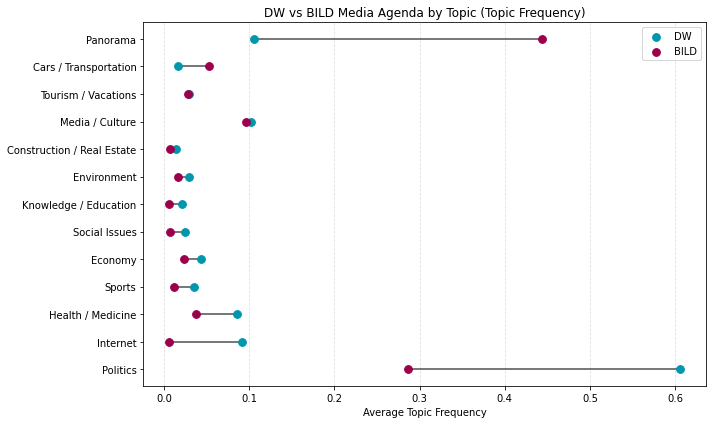

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

y_pos = range(len(topic_df))

ax.hlines(
    y=y_pos,
    xmin=topic_df["DW"],
    xmax=topic_df["BILD"],
    color="0.25",
    linewidth=2,
    alpha=0.7
)

# points
ax.scatter(
    topic_df["DW"],
    y_pos,
    s=60,
    color="#0097ac",
    label="DW",
    zorder=3
)

ax.scatter(
    topic_df["BILD"],
    y_pos,
    s=60,
    color="#9c004b",
    label="BILD",
    zorder=3
)

# y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(topic_df["classified topic"])

ax.set_xlabel(f"Average {METRIC.replace('_', ' ').title()}")
ax.set_title(f"DW vs BILD Media Agenda by Topic ({METRIC.replace('_', ' ').title()})")

ax.legend()
ax.grid(axis="x", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


In [22]:
import matplotlib.pyplot as plt
import pandas as pd


METRIC_PUBLIC = "comment_share"

# =============================
# Aggregate by topic
# =============================
dw_comment = (
    DW_combined_metrics
    .groupby("classified topic")[METRIC_PUBLIC]
    .mean()
    .reset_index()
    .rename(columns={METRIC_PUBLIC: "DW"})
)

bild_comment = (
    BILD_combined_metrics
    .groupby("classified topic")[METRIC_PUBLIC]
    .mean()
    .reset_index()
    .rename(columns={METRIC_PUBLIC: "BILD"})
)

comment_df = pd.merge(dw_comment, bild_comment, on="classified topic", how="inner")

# Difference for sorting
comment_df["diff"] = comment_df["BILD"] - comment_df["DW"]

# Sort by difference
comment_df = comment_df.sort_values("diff")

comment_df.head()


,classified topic,DW,BILD,diff
9,Politics,0.684607,0.405248,-0.279359
5,Internet,0.088383,0.002439,-0.085944
4,Health / Medicine,0.088027,0.037774,-0.050253
2,Economy,0.032905,0.016289,-0.016617
11,Sports,0.017748,0.005597,-0.012152


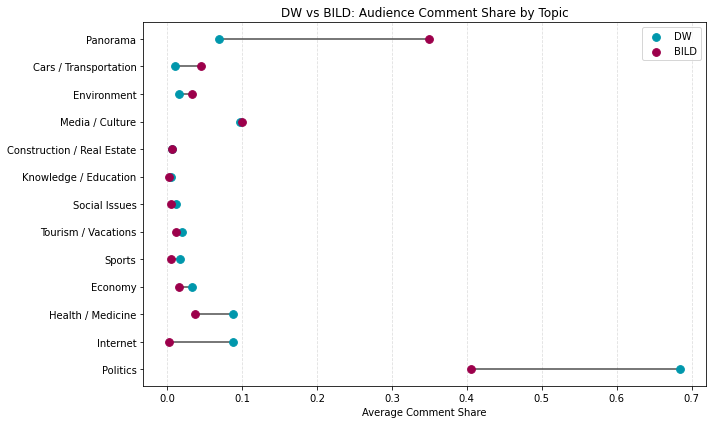

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

y_pos = range(len(comment_df))

ax.hlines(
    y=y_pos,
    xmin=comment_df["DW"],
    xmax=comment_df["BILD"],
    color="0.25",
    linewidth=2,
    alpha=0.7
)

ax.scatter(
    comment_df["DW"],
    y_pos,
    s=60,
    color="#0097ac",
    label="DW",
    zorder=3
)

ax.scatter(
    comment_df["BILD"],
    y_pos,
    s=60,
    color="#9c004b",
    label="BILD",
    zorder=3
)

ax.set_yticks(list(y_pos))
ax.set_yticklabels(comment_df["classified topic"])

ax.set_xlabel("Average Comment Share")
ax.set_title("DW vs BILD: Audience Comment Share by Topic")

ax.legend()
ax.grid(axis="x", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

bild_frequency = (
    BILD_combined_metrics
    .groupby("classified topic")["topic_frequency"]
    .mean()
    .reset_index()
    .rename(columns={"topic_frequency": "Topic Frequency"})
)

bild_comment = (
    BILD_combined_metrics
    .groupby("classified topic")["comment_share"]
    .mean()
    .reset_index()
    .rename(columns={"comment_share": "Comment Share"})
)

bild_freq_comment_df = pd.merge(
    bild_frequency,
    bild_comment,
    on="classified topic",
    how="inner"
)

bild_freq_comment_df["diff"] = (
    bild_freq_comment_df["Comment Share"]
    - bild_freq_comment_df["Topic Frequency"]
)

bild_freq_comment_df = bild_freq_comment_df.sort_values("diff")

bild_freq_comment_df.head()


,classified topic,Topic Frequency,Comment Share,diff
8,Panorama,0.444135,0.349226,-0.094909
12,Tourism / Vacations,0.028391,0.012012,-0.016379
0,Cars / Transportation,0.053264,0.045548,-0.007716
2,Economy,0.023495,0.016289,-0.007206
11,Sports,0.011993,0.005597,-0.006396


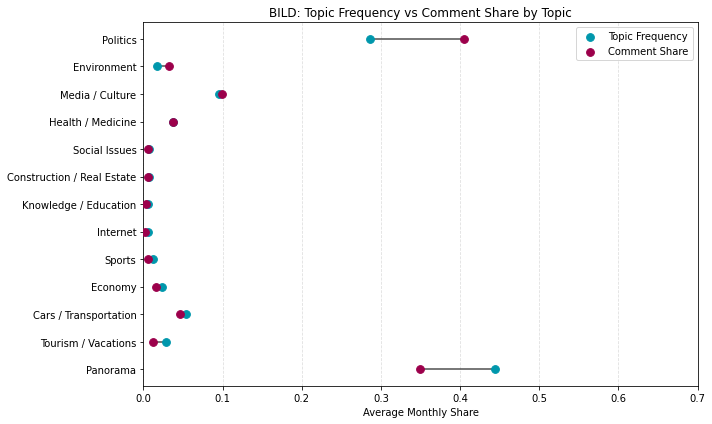

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

y_pos = range(len(bild_freq_comment_df))

ax.hlines(
    y=y_pos,
    xmin=bild_freq_comment_df["Topic Frequency"],
    xmax=bild_freq_comment_df["Comment Share"],
    color="0.25",
    linewidth=2,
    alpha=0.7
)

ax.scatter(
    bild_freq_comment_df["Topic Frequency"],
    y_pos,
    s=60,
    color="#0097ac",
    label="Topic Frequency",
    zorder=3
)

ax.scatter(
    bild_freq_comment_df["Comment Share"],
    y_pos,
    s=60,
    color="#9c004b",
    label="Comment Share",
    zorder=3
)

ax.set_yticks(list(y_pos))
ax.set_yticklabels(bild_freq_comment_df["classified topic"])

ax.set_xlabel("Average Monthly Share")
ax.set_title("BILD: Topic Frequency vs Comment Share by Topic")

ax.set_xlim(0, 0.7)

ax.legend()
ax.grid(axis="x", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


In [26]:
dw_frequency = (
    DW_combined_metrics
    .groupby("classified topic")["topic_frequency"]
    .mean()
    .reset_index()
    .rename(columns={"topic_frequency": "Topic Frequency"})
)

dw_comment = (
    DW_combined_metrics
    .groupby("classified topic")["comment_share"]
    .mean()
    .reset_index()
    .rename(columns={"comment_share": "Comment Share"})
)

dw_freq_comment_df = pd.merge(
    dw_frequency,
    dw_comment,
    on="classified topic",
    how="inner"
)

dw_freq_comment_df["diff"] = (
    dw_freq_comment_df["Comment Share"]
    - dw_freq_comment_df["Topic Frequency"]
)

dw_freq_comment_df = dw_freq_comment_df.sort_values("diff")

dw_freq_comment_df.head()


,classified topic,Topic Frequency,Comment Share,diff
8,Panorama,0.105193,0.069606,-0.035587
11,Sports,0.035378,0.017748,-0.017630
6,Knowledge / Education,0.020626,0.004833,-0.015793
3,Environment,0.029295,0.015221,-0.014073
10,Social Issues,0.024977,0.011297,-0.013679


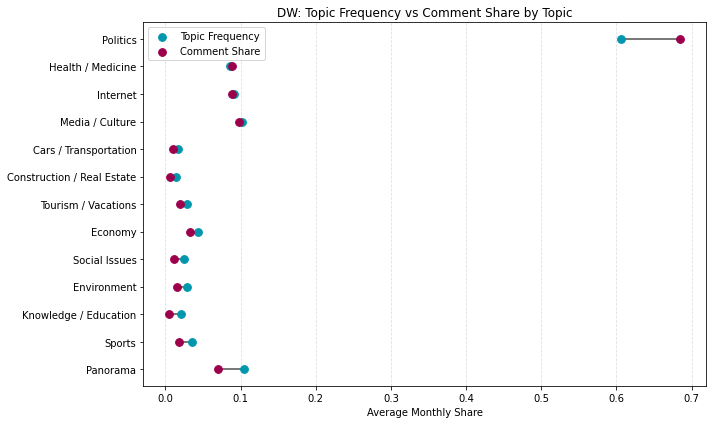

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

y_pos = range(len(dw_freq_comment_df))

ax.hlines(
    y=y_pos,
    xmin=dw_freq_comment_df["Topic Frequency"],
    xmax=dw_freq_comment_df["Comment Share"],
    color="0.25",
    linewidth=2,
    alpha=0.7
)

ax.scatter(
    dw_freq_comment_df["Topic Frequency"],
    y_pos,
    s=60,
    color="#0097ac",
    label="Topic Frequency",
    zorder=3
)

ax.scatter(
    dw_freq_comment_df["Comment Share"],
    y_pos,
    s=60,
    color="#9c004b",
    label="Comment Share",
    zorder=3
)

ax.set_yticks(list(y_pos))
ax.set_yticklabels(dw_freq_comment_df["classified topic"])

ax.set_xlabel("Average Monthly Share")
ax.set_title("DW: Topic Frequency vs Comment Share by Topic")

ax.legend()
ax.grid(axis="x", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()



=================================== 2. Correlation calculations=======================================


In [28]:
from scipy.stats import spearmanr

bild = BILD_combined_metrics.copy()

bild["date"] = pd.to_datetime(bild["month"], format="%Y-%m", errors="coerce")
bild = bild.dropna(subset=["date"]).sort_values("date")

def spearman_corr(df, x, y):
    sub = df[[x, y]].dropna()
    if sub[x].nunique() < 2 or sub[y].nunique() < 2:
        return None, None

    rho, p = spearmanr(sub[x], sub[y])
    return rho, p

def p_to_stars(p):
    if pd.isna(p) or p is None:
        return ""
    elif p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return ""

def build_corr_matrix(df, row_vars, col_vars, title, diag_is_one=True):
    # build rho and p matrices
    rho_mat = pd.DataFrame(index=row_vars, columns=col_vars, dtype=float)
    p_mat = pd.DataFrame(index=row_vars, columns=col_vars, dtype=float)

    for x in row_vars:
        for y in col_vars:
            if diag_is_one and (x == y) and (row_vars == col_vars):
                rho_mat.loc[x, y] = 1.0
                p_mat.loc[x, y] = 0.0
            else:
                rho, p = spearman_corr(df, x, y)
                rho_mat.loc[x, y] = rho
                p_mat.loc[x, y] = p

    # annotate with stars
    annotated = rho_mat.copy().astype(object)

    for i in rho_mat.index:
        for j in rho_mat.columns:
            r = rho_mat.loc[i, j]
            p = p_mat.loc[i, j]

            if pd.isna(r) or r is None:
                annotated.loc[i, j] = ""
            elif diag_is_one and (row_vars == col_vars) and (i == j):
                annotated.loc[i, j] = "1.00"
            else:
                annotated.loc[i, j] = f"{r:.2f}{p_to_stars(p)}"

    print(title)
    return annotated


media_metrics = [
    "topic_frequency",
    "topic_duration",
    "topic_sentiment (media)"
]

public_metrics = [
    "view_share",
    "like_share",
    "comment_share",
    "reply_ratio",
    "topic_sentiment (public)"
]


BILD_media_media_matrix = build_corr_matrix(
    bild, media_metrics, media_metrics,
    "BILD: Media Agenda – Spearman Correlation Matrix",
    diag_is_one=True
)

BILD_public_public_matrix = build_corr_matrix(
    bild, public_metrics, public_metrics,
    "BILD: Public Agenda – Spearman Correlation Matrix",
    diag_is_one=True
)

BILD_media_public_matrix = build_corr_matrix(
    bild, media_metrics, public_metrics,
    "BILD: Media × Public Agenda Spearman Correlations",
    diag_is_one=False  
)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


BILD: Media Agenda – Spearman Correlation Matrix
BILD: Public Agenda – Spearman Correlation Matrix
BILD: Media × Public Agenda Spearman Correlations


In [29]:
print("BILD: Media Agenda – Spearman Correlation Matrix")
display(BILD_media_media_matrix)

print("BILD: Public Agenda – Spearman Correlation Matrix")
display(BILD_public_public_matrix)

print("BILD: Media × Public Agenda Spearman Correlations")
display(BILD_media_public_matrix)

BILD: Media Agenda – Spearman Correlation Matrix


,topic_frequency,topic_duration,topic_sentiment (media)
topic_frequency,1.00,0.94***,-0.12**
topic_duration,0.94***,1.00,-0.04
topic_sentiment (media),-0.12**,-0.04,1.00


BILD: Public Agenda – Spearman Correlation Matrix


,view_share,like_share,comment_share,reply_ratio,topic_sentiment (public)
view_share,1.00,0.97***,0.94***,-0.05,-0.17***
like_share,0.97***,1.00,0.96***,-0.10*,-0.21***
comment_share,0.94***,0.96***,1.00,-0.07,-0.27***
reply_ratio,-0.05,-0.10*,-0.07,1.00,0.12**
topic_sentiment (public),-0.17***,-0.21***,-0.27***,0.12**,1.00


BILD: Media × Public Agenda Spearman Correlations


,view_share,like_share,comment_share,reply_ratio,topic_sentiment (public)
topic_frequency,0.91***,0.89***,0.91***,0.04,-0.14**
topic_duration,0.85***,0.86***,0.91***,-0.01,-0.21***
topic_sentiment (media),-0.18***,-0.13**,-0.13**,-0.07,0.23***


In [30]:
dw = DW_combined_metrics.copy()
dw["date"] = pd.to_datetime(dw["month"], format="%Y-%m", errors="coerce")
dw = dw.dropna(subset=["date"])

DW_media_media_matrix = build_corr_matrix(
    dw, media_metrics, media_metrics,
    "DW: Media Agenda – Spearman Correlation Matrix",
    diag_is_one=True
)

DW_public_public_matrix = build_corr_matrix(
    dw, public_metrics, public_metrics,
    "DW: Public Agenda – Spearman Correlation Matrix",
    diag_is_one=True
)

DW_media_public_matrix = build_corr_matrix(
    dw, media_metrics, public_metrics,
    "DW: Media × Public Agenda Spearman Correlations",
    diag_is_one=False
)

DW: Media Agenda – Spearman Correlation Matrix
DW: Public Agenda – Spearman Correlation Matrix
DW: Media × Public Agenda Spearman Correlations


In [31]:
print("DW: Media Agenda – Spearman Correlation Matrix")
display(DW_media_media_matrix)

print("DW: Public Agenda – Spearman Correlation Matrix")
display(DW_public_public_matrix)

print("DW: Media × Public Agenda Spearman Correlations")
display(DW_media_public_matrix)

DW: Media Agenda – Spearman Correlation Matrix


,topic_frequency,topic_duration,topic_sentiment (media)
topic_frequency,1.00,0.92***,-0.16**
topic_duration,0.92***,1.00,-0.10
topic_sentiment (media),-0.16**,-0.10,1.00


DW: Public Agenda – Spearman Correlation Matrix


,view_share,like_share,comment_share,reply_ratio,topic_sentiment (public)
view_share,1.00,0.97***,0.94***,0.25***,-0.19***
like_share,0.97***,1.00,0.93***,0.23***,-0.16**
comment_share,0.94***,0.93***,1.00,0.34***,-0.22***
reply_ratio,0.25***,0.23***,0.34***,1.00,-0.06
topic_sentiment (public),-0.19***,-0.16**,-0.22***,-0.06,1.00


DW: Media × Public Agenda Spearman Correlations


,view_share,like_share,comment_share,reply_ratio,topic_sentiment (public)
topic_frequency,0.88***,0.89***,0.86***,0.18***,-0.20***
topic_duration,0.84***,0.86***,0.84***,0.12*,-0.20***
topic_sentiment (media),-0.10,-0.11*,-0.11,0.02,0.24***



=================================== 3. Additional calculations=======================================


In [48]:
# Average views per video
avg_views_bild = BILD_media["view_count"].mean()
avg_views_dw = DW_media["view_count"].mean()

avg_views_bild, avg_views_dw

(129605.71550896877, 48546.43587970964)

In [51]:
# Average video length in minutes
avg_length_bild = (BILD_media["video_length"].mean())/60
avg_length_dw = (DW_media["video_length"].mean())/60
avg_length_bild, avg_length_dw

(5.0677234812135525, 9.419512616660906)

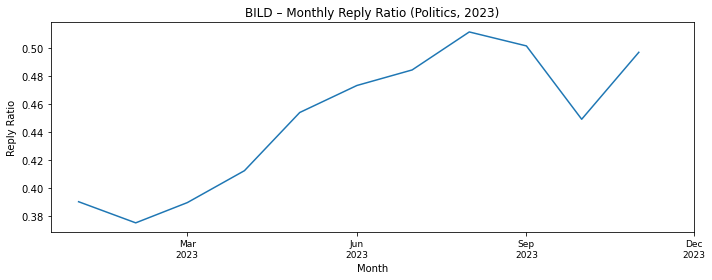

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

bild = BILD_combined_metrics.copy()

bild["date"] = pd.to_datetime(bild["month"], format="%Y-%m", errors="coerce")
bild = bild.dropna(subset=["date"])

bild = bild[
    (bild["date"].dt.year == 2023) &
    (bild["classified topic"] == "Politics")
].sort_values("date")

full_months = pd.date_range("2023-01-01", "2023-12-01", freq="MS")

y = (
    bild.set_index("date")["reply_ratio"]
        .reindex(full_months)
        .astype(float)
        .to_numpy()
)

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(full_months.to_numpy(), y)

quarter_months = full_months[full_months.month.isin([3, 6, 9, 12])]
ax.set_xticks(quarter_months.to_numpy())
ax.set_xticklabels(
    [f"{d.strftime('%b')}\n{d.strftime('%Y')}" for d in quarter_months],
    fontsize=9
)

ax.set_title("BILD – Monthly Reply Ratio (Politics, 2023)")
ax.set_ylabel("Reply Ratio")
ax.set_xlabel("Month")

plt.tight_layout()
plt.show()


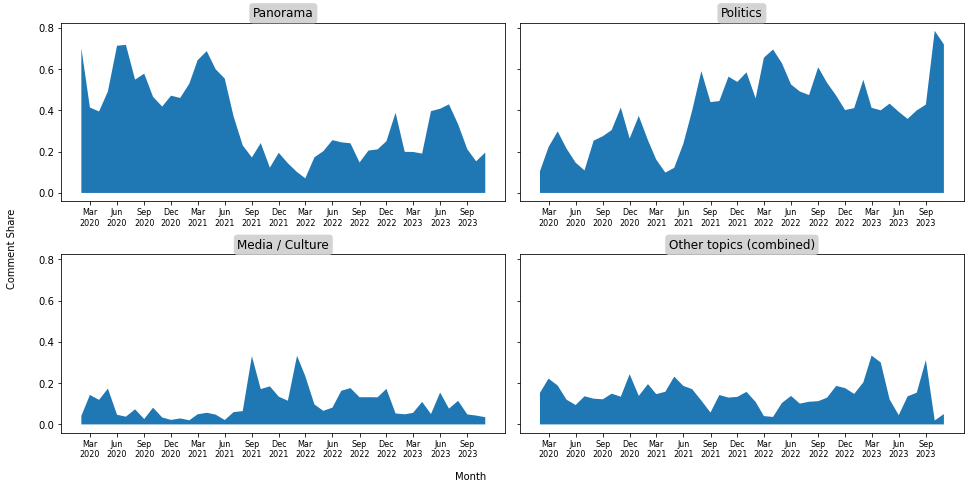

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

bild = BILD_combined_metrics.copy()

bild["date"] = pd.to_datetime(bild["month"], format="%Y-%m", errors="coerce")
bild = bild.dropna(subset=["date"]).sort_values("date")

selected_topics = ["Panorama", "Politics", "Media / Culture"]
topics = selected_topics + ["Other topics (combined)"]

full_months = pd.date_range(bild["date"].min(), bild["date"].max(), freq="MS")

selected = bild[bild["classified topic"].isin(selected_topics)][
    ["date", "classified topic", "comment_share"]
].rename(columns={"comment_share": "value"})

others = bild[~bild["classified topic"].isin(selected_topics)].copy()

others_monthly = (
    others.groupby("date", as_index=False)
          .agg(value=("comment_share", "sum"))
)

others_monthly["classified topic"] = "Other topics (combined)"

plot_df = pd.concat([selected, others_monthly], ignore_index=True)

fig, axes = plt.subplots(2, 2, figsize=(14, 7), sharey=True)
axes = axes.flatten()

quarter_end_months = full_months[full_months.month.isin([3, 6, 9, 12])]

for ax, topic in zip(axes, topics):
    sub = plot_df[plot_df["classified topic"] == topic].sort_values("date")

    y = (
        sub.set_index("date")["value"]
           .reindex(full_months)
           .fillna(0)
    )

    ax.fill_between(full_months.to_numpy(), y.to_numpy(), 0)

    ax.set_title(
        topic,
        bbox=dict(
            facecolor="lightgrey",
            edgecolor="none",
            boxstyle="round,pad=0.3"
        )
    )

    ax.set_xticks(quarter_end_months)
    ax.set_xticklabels(
        [f"{d.strftime('%b')}\n{d.strftime('%Y')}" for d in quarter_end_months],
        fontsize=8
    )

    ax.tick_params(axis="x", rotation=0)

# global labels
fig.text(0.5, 0.04, "Month", ha="center")
fig.text(0.04, 0.5, "Comment Share", va="center", rotation="vertical")

plt.tight_layout(rect=[0.06, 0.06, 1, 1])
plt.savefig("BILD_comment_share_small_multiples_with_other.png", dpi=300, bbox_inches="tight")
plt.show()


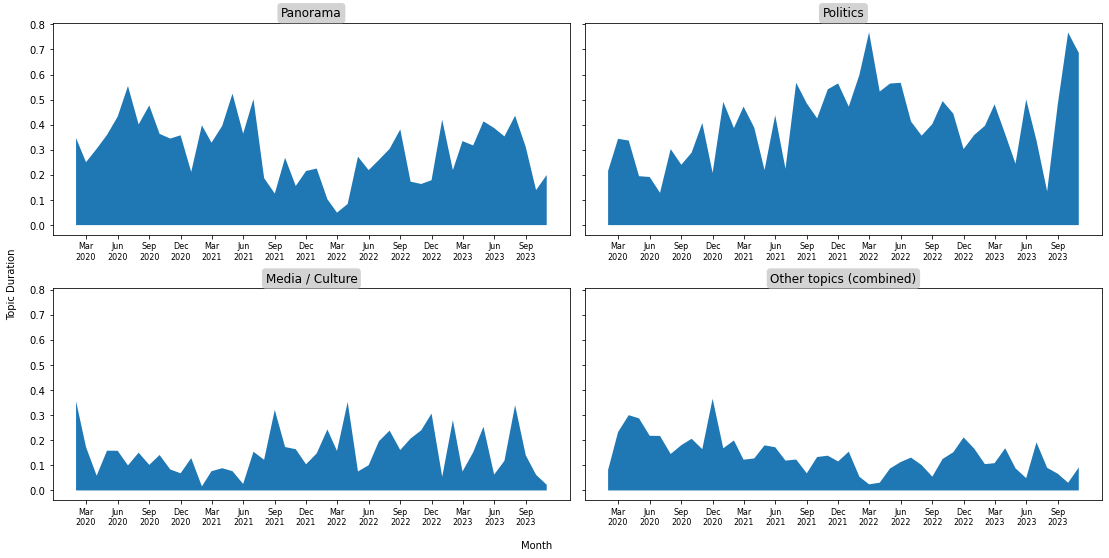

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

bild = BILD_combined_metrics.copy()

bild["date"] = pd.to_datetime(bild["month"], format="%Y-%m", errors="coerce")
bild = bild.dropna(subset=["date"]).sort_values("date")

selected_topics = ["Panorama", "Politics", "Media / Culture"]

full_months = pd.date_range(bild["date"].min(), bild["date"].max(), freq="MS")

others = bild[~bild["classified topic"].isin(selected_topics)].copy()

others_monthly = (
    others.groupby("date", as_index=False)
          .agg(other_topic_duration=("topic_duration", "sum"))
)

others_monthly["classified topic"] = "Other topics (combined)"

others_monthly = others_monthly[["date", "classified topic", "other_topic_duration"]]
others_monthly = others_monthly.rename(columns={"other_topic_duration": "topic_duration"})

bild_selected = bild[
    bild["classified topic"].isin(selected_topics)
][["date", "classified topic", "topic_duration"]]

bild_plot = pd.concat([bild_selected, others_monthly], ignore_index=True)

topics = selected_topics + ["Other topics (combined)"]

fig, axes = plt.subplots(
    2, 2,
    figsize=(16, 8),
    sharey=True
)
axes = axes.flatten()

for ax, topic in zip(axes, topics):
    sub = bild_plot[bild_plot["classified topic"] == topic].sort_values("date")

    y = (
        sub.set_index("date")["topic_duration"]
           .reindex(full_months)
    )

    ax.fill_between(
        full_months.to_numpy(),
        y.to_numpy(),
        0
    )

    ax.set_title(
        topic,
        bbox=dict(
            facecolor="lightgrey",
            edgecolor="none",
            boxstyle="round,pad=0.3"
        )
    )

    quarter_end_months = full_months[full_months.month.isin([3, 6, 9, 12])]
    ax.set_xticks(quarter_end_months)

    ax.set_xticklabels(
        [f"{d.strftime('%b')}\n{d.strftime('%Y')}" for d in quarter_end_months],
        fontsize=8
    )

    ax.tick_params(axis="x", rotation=0)

# global labels
fig.text(0.5, 0.04, "Month", ha="center")
fig.text(0.04, 0.5, "Topic Duration", va="center", rotation="vertical")

plt.tight_layout(rect=[0.05, 0.06, 1, 1])
plt.savefig(
    "BILD_topic_duration_selected_plus_other.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


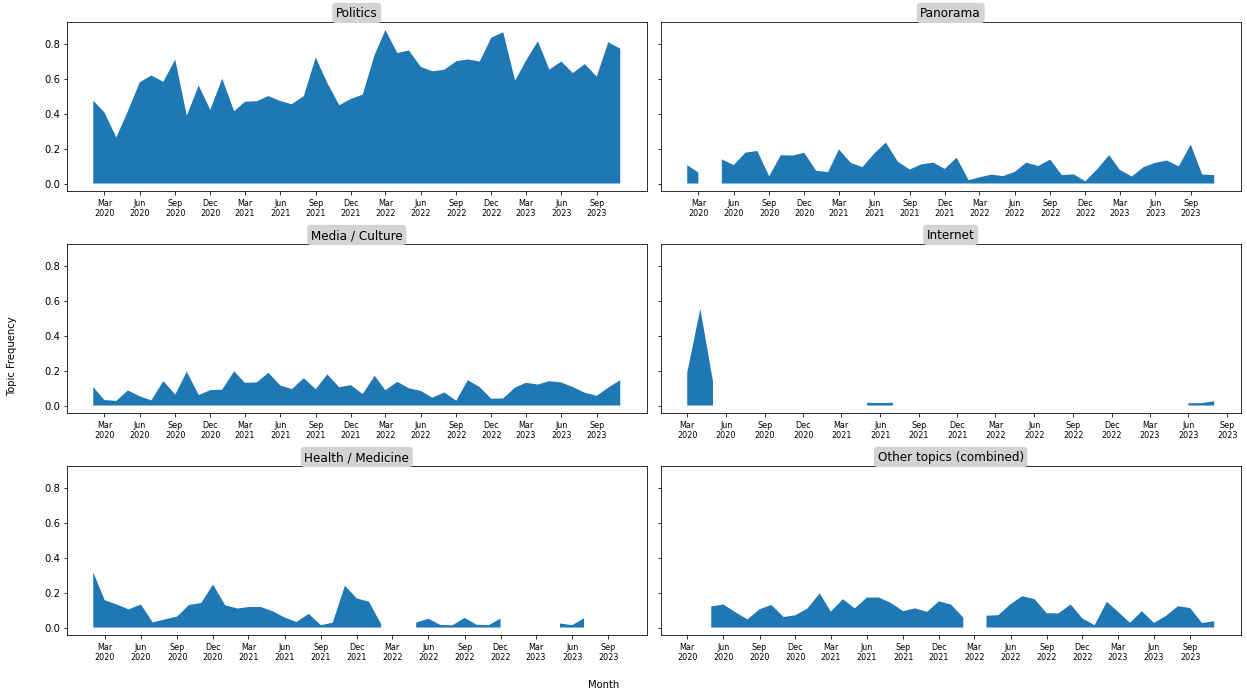

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

dw = DW_combined_metrics.copy()

dw["date"] = pd.to_datetime(dw["month"], format="%Y-%m", errors="coerce")
dw = dw.dropna(subset=["date"]).sort_values("date")

selected_topics = ["Politics", "Panorama", "Media / Culture", "Internet", "Health / Medicine"]

full_months = pd.date_range(dw["date"].min(), dw["date"].max(), freq="MS")

others = dw[~dw["classified topic"].isin(selected_topics)].copy()

others_monthly = (
    others.groupby("date", as_index=False)
          .agg(other_video_count=("video_count", "sum"),
               total_videos=("total_videos", "first"))
)

others_monthly["topic_frequency"] = (
    others_monthly["other_video_count"] / others_monthly["total_videos"]
)
others_monthly["classified topic"] = "Other topics (combined)"

others_monthly = others_monthly[["date", "classified topic", "topic_frequency"]]

dw_selected = dw[dw["classified topic"].isin(selected_topics)][
    ["date", "classified topic", "topic_frequency"]
]
dw_plot = pd.concat([dw_selected, others_monthly], ignore_index=True)

topics = selected_topics + ["Other topics (combined)"]

fig, axes = plt.subplots(
    3, 2,                     
    figsize=(18, 10),          
    sharey=True
)
axes = axes.flatten()

for ax, topic in zip(axes, topics):
    sub = dw_plot[dw_plot["classified topic"] == topic].sort_values("date")

    y = (
        sub.set_index("date")["topic_frequency"]
           .reindex(full_months)
    )

    ax.fill_between(
        full_months.to_numpy(),
        y.to_numpy(),
        0
    )

    ax.set_title(
        topic,
        bbox=dict(
            facecolor="lightgrey",
            edgecolor="none",
            boxstyle="round,pad=0.3"
        )
    )

    quarter_end_months = full_months[full_months.month.isin([3, 6, 9, 12])]
    ax.set_xticks(quarter_end_months)

    ax.set_xticklabels(
        [f"{d.strftime('%b')}\n{d.strftime('%Y')}" for d in quarter_end_months],
        fontsize=8
    )

    ax.tick_params(axis="x", rotation=0)

fig.text(0.5, 0.04, "Month", ha="center")
fig.text(0.04, 0.5, "Topic Frequency", va="center", rotation="vertical")

plt.tight_layout(rect=[0.06, 0.06, 1, 1])
plt.savefig(
    "DW_topic_frequency_small_multiples_with_other.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


In [36]:
import ast
import re
from collections import Counter

HASHTAG_STOPLIST = {
    "bild",
    "bildlive",
    "bildlagezentrum",
    "bildtv",
    "news",
    "nachrichten",
    "viertelnachacht"
}

def _parse_hashtags(x):
    if pd.isna(x):
        return []
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        s = x.strip()
        if s == "" or s == "[]":
            return []
        try:
            parsed = ast.literal_eval(s)
            return parsed if isinstance(parsed, list) else []
        except Exception:
            return re.findall(r"#\w+", s)
    return []

def prepare_hashtag_table_by_topic(
    df,
    topic_col="classified topic",
    hashtags_col="hashtags",
    min_hashtag_count=2
):
    df = df.copy()

    df[hashtags_col] = df[hashtags_col].apply(_parse_hashtags)

    exploded = df[[topic_col, hashtags_col]].explode(hashtags_col).dropna()

    exploded["hashtag"] = (
        exploded[hashtags_col]
        .astype(str)
        .str.strip()
        .str.replace(r"^#+", "", regex=True)
        .str.lower()
    )

    exploded = exploded[
        (exploded["hashtag"] != "") &
        (~exploded["hashtag"].isin(HASHTAG_STOPLIST))
    ]

    counts = (
        exploded
        .groupby([topic_col, "hashtag"])
        .size()
        .reset_index(name="count")
    )

    if min_hashtag_count > 1:
        counts = counts[counts["count"] >= min_hashtag_count]

    return counts.sort_values([topic_col, "count"], ascending=[True, False])


In [37]:
top_hashtags_table = prepare_hashtag_table_by_topic(
    BILD_media,
    topic_col="classified topic",
    hashtags_col="hashtags",
    min_hashtag_count=2
)

top_hashtags_table.head(20)


,classified topic,hashtag,count
651,Cars / Transportation,unfall,272
488,Cars / Transportation,polizei,61
64,Cars / Transportation,autobahn,54
119,Cars / Transportation,berlin,43
63,Cars / Transportation,auto,41
173,Cars / Transportation,crash,36
402,Cars / Transportation,lkw,33
87,Cars / Transportation,autounfall,27
163,Cars / Transportation,china,23
310,Cars / Transportation,hamburg,16


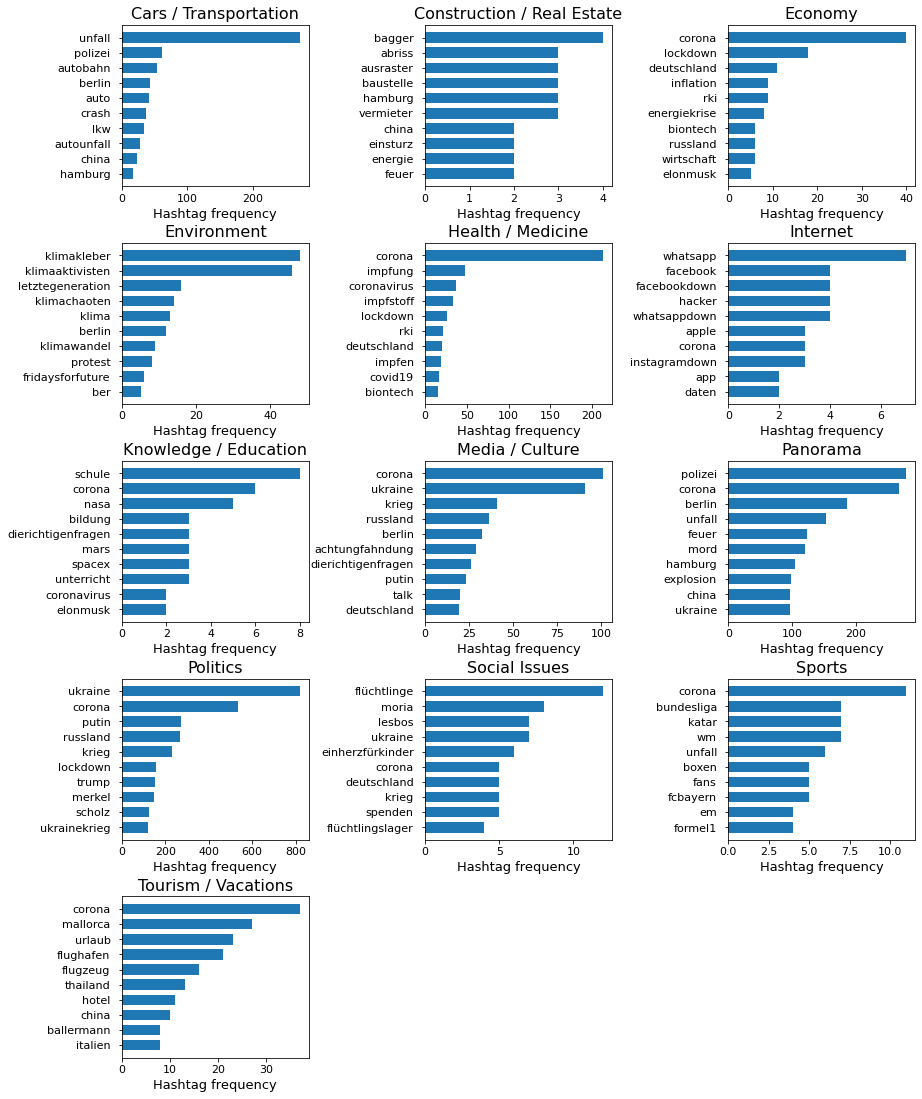

In [38]:
df = top_hashtags_table.copy()
df = df.sort_values(["classified topic", "count"], ascending=[True, False])

topics = df["classified topic"].unique()

n_cols = 3
n_rows = (len(topics) + n_cols - 1) // n_cols

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(22, 3.8 * n_rows),
    sharex=False
)

axes = axes.flatten()

for ax, topic in zip(axes, topics):
    sub = df[df["classified topic"] == topic].head(10)

    ax.barh(sub["hashtag"], sub["count"], height=0.7)

    ax.set_title(topic, fontsize=16, pad=6)
    ax.set_xlabel("Hashtag frequency", fontsize=13)

    ax.tick_params(axis="y", labelsize=11.2, pad=8)
    ax.tick_params(axis="x", labelsize=11)

    ax.invert_yaxis()

for ax in axes[len(topics):]:
    ax.remove()

plt.subplots_adjust(left=0.45, right=0.98, hspace=0.35, wspace=0.30)

for ax in fig.axes:
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0, pos.width * 0.80, pos.height])

plt.savefig("BILD_top_hashtags.png", dpi=300, bbox_inches="tight")
plt.show()


In [39]:
DW_top_hashtags_table = prepare_hashtag_table_by_topic(
    DW_media,                     
    topic_col="classified topic",
    hashtags_col="hashtags",
    min_hashtag_count=2
)

DW_top_hashtags_table.head(20)


,classified topic,hashtag,count
0,Cars / Transportation,auto,2
1,Cars / Transportation,autobahn,2
7,Cars / Transportation,eauto,2
9,Cars / Transportation,elektroauto,2
25,Cars / Transportation,klimawandel,2
33,Cars / Transportation,streik,2
34,Cars / Transportation,tempolimit,2
35,Cars / Transportation,verbrenner,2
36,Cars / Transportation,verkehr,2
238,Economy,wirtschaft,12


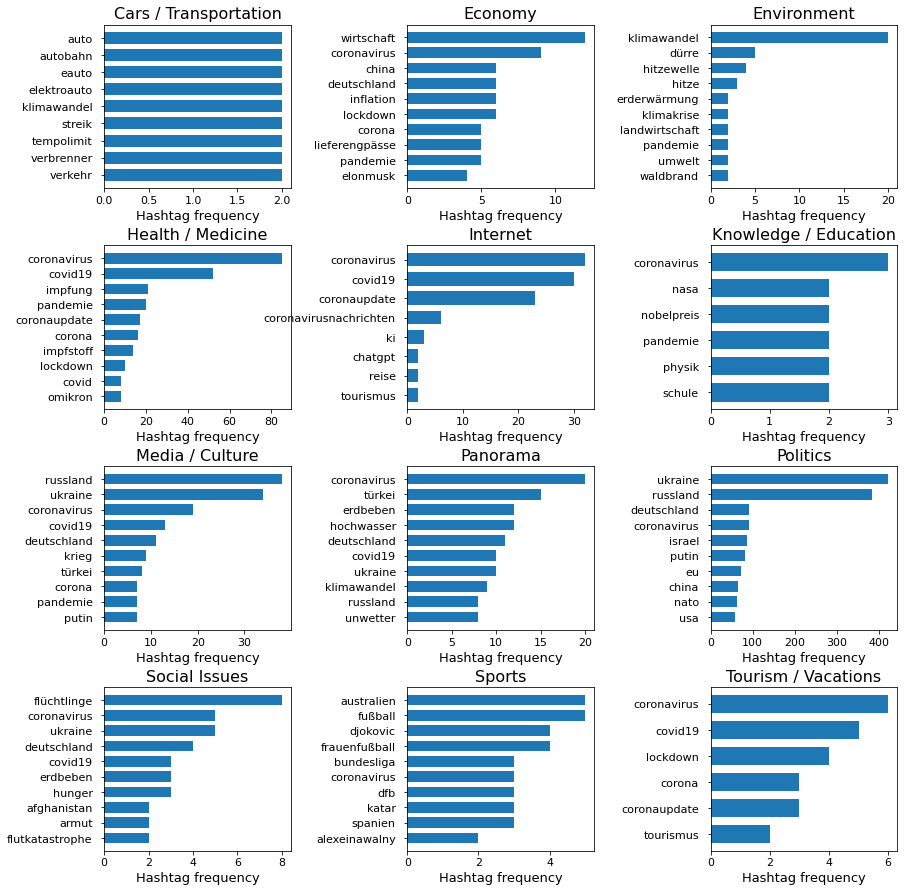

In [40]:
import matplotlib.pyplot as plt

df = DW_top_hashtags_table.copy()
df = df.sort_values(["classified topic", "count"], ascending=[True, False])

topics = df["classified topic"].unique()

n_cols = 3
n_rows = (len(topics) + n_cols - 1) // n_cols

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(22, 3.8 * n_rows),
    sharex=False
)

axes = axes.flatten()

for ax, topic in zip(axes, topics):
    sub = df[df["classified topic"] == topic].head(10)

    ax.barh(sub["hashtag"], sub["count"], height=0.7)

    ax.set_title(topic, fontsize=16, pad=6)
    ax.set_xlabel("Hashtag frequency", fontsize=13)

    ax.tick_params(axis="y", labelsize=11.2, pad=8)
    ax.tick_params(axis="x", labelsize=11)

    ax.invert_yaxis()

for ax in axes[len(topics):]:
    ax.remove()

plt.subplots_adjust(left=0.45, right=0.98, hspace=0.35, wspace=0.30)

for ax in fig.axes:
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0, pos.width * 0.80, pos.height])

plt.savefig("DW_top_hashtags.png", dpi=300, bbox_inches="tight")
plt.show()


In [41]:
# Calculating comment availability for BILD
bild_total_videos = len(BILD_media)
bild_videos_without_comments = (BILD_media["comment_count"] == 0).sum()

bild_comment_availability = pd.DataFrame({
    "outlet": ["BILD"],
    "total_videos": [bild_total_videos],
    "videos_without_comments": [bild_videos_without_comments],
    "pct_without_comments": [
        100 * bild_videos_without_comments / bild_total_videos
    ]
})

bild_comment_availability


,outlet,total_videos,videos_without_comments,pct_without_comments
0,BILD,13547,206,1.520632


In [42]:
# Calculating comment availability for DW
dw_total_videos = len(DW_media)
dw_videos_without_comments = (DW_media["comment_count"] == 0).sum()

dw_comment_availability = pd.DataFrame({
    "outlet": ["DW"],
    "total_videos": [dw_total_videos],
    "videos_without_comments": [dw_videos_without_comments],
    "pct_without_comments": [
        100 * dw_videos_without_comments / dw_total_videos
    ]
})

dw_comment_availability


,outlet,total_videos,videos_without_comments,pct_without_comments
0,DW,2893,249,8.606982


In [43]:
# per topic comment availability BILD
bild_summary = (
    BILD_media
    .groupby("classified topic")
    .agg(
        total_videos=("video_url", "count"),
        videos_without_comments=("comment_count", lambda x: (x == 0).sum())
    )
    .assign(
        pct_without_comments=lambda df:
        df["videos_without_comments"] / df["total_videos"]
    )
    .reset_index()
)

total_row = pd.DataFrame({
    "classified topic": ["Total (all topics)"],
    "total_videos": [len(BILD_media)],
    "videos_without_comments": [(BILD_media["comment_count"] == 0).sum()],
    "pct_without_comments": [
        (BILD_media["comment_count"] == 0).sum() / len(BILD_media)
    ]
})


bild_summary = (
    pd.concat([bild_summary, total_row], ignore_index=True)
    .sort_values("pct_without_comments", ascending=False)
)

bild_summary


,classified topic,total_videos,videos_without_comments,pct_without_comments
10,Social Issues,72,4,0.055556
11,Sports,135,3,0.022222
6,Knowledge / Education,51,1,0.019608
7,Media / Culture,1326,26,0.019608
9,Politics,3883,71,0.018285
13,Total (all topics),13547,206,0.015206
8,Panorama,5985,91,0.015205
4,Health / Medicine,486,4,0.008230
0,Cars / Transportation,684,4,0.005848
2,Economy,310,1,0.003226


In [44]:
# per topic comment availability DW

dw_summary = (
    DW_media
    .groupby("classified topic")
    .agg(
        total_videos=("video_url", "count"),
        videos_without_comments=("comment_count", lambda x: (x == 0).sum())
    )
    .assign(
        pct_without_comments=lambda df:
        df["videos_without_comments"] / df["total_videos"]
    )
    .reset_index()
)

total_row = pd.DataFrame({
    "classified topic": ["Total (all topics)"],
    "total_videos": [len(DW_media)],
    "videos_without_comments": [(DW_media["comment_count"] == 0).sum()],
    "pct_without_comments": [
        (DW_media["comment_count"] == 0).sum() / len(DW_media)
    ]
})

dw_summary = (
    pd.concat([dw_summary, total_row], ignore_index=True)
    .sort_values("pct_without_comments", ascending=False)
)

dw_summary


,classified topic,total_videos,videos_without_comments,pct_without_comments
4,Health / Medicine,168,35,0.208333
10,Social Issues,40,5,0.125000
9,Politics,1803,157,0.087077
13,Total (all topics),2893,249,0.086070
8,Panorama,298,24,0.080537
7,Media / Culture,297,23,0.077441
6,Knowledge / Education,13,1,0.076923
12,Tourism / Vacations,18,1,0.055556
2,Economy,109,3,0.027523
0,Cars / Transportation,18,0,0.000000


In [47]:
# showing the most frequent hashtags for Politics in 2023 for the first and second half of the year (BILD)

import ast
from collections import Counter
from IPython.display import display

pd.set_option("display.max_colwidth", None)
def parse_hashtags(x):
    if pd.isna(x):
        return []
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        s = x.strip()
        if s == "" or s == "[]":
            return []
        try:
            parsed = ast.literal_eval(s)
            return parsed if isinstance(parsed, list) else []
        except Exception:
            return re.findall(r"#\w+", s)
    return []


df = BILD_media.copy()

df["date"] = pd.to_datetime(df["published_at"], errors="coerce")
df = df.dropna(subset=["date"])

df = df[
    (df["date"].dt.year == 2023) &
    (df["classified topic"] == "Politics")
]

# define halves of the year
df["half"] = df["date"].dt.month.apply(
    lambda m: "H1 (Jan–Jun)" if m <= 6 else "H2 (Jul–Nov)" # November, because December 2023 is not included in the data
)


df["hashtags_parsed"] = df["hashtags"].apply(parse_hashtags)

exploded = df.explode("hashtags_parsed").dropna(subset=["hashtags_parsed"])

exploded["hashtag_clean"] = (
    exploded["hashtags_parsed"]
        .astype(str)
        .str.strip()
        .str.replace(r"^#+", "", regex=True)
        .str.lower()
)

exploded = exploded[
    (exploded["hashtag_clean"] != "") &
    (~exploded["hashtag_clean"].isin(HASHTAG_STOPLIST))
]

top_hashtags_halves = (
    exploded
        .groupby("half")["hashtag_clean"]
        .apply(lambda x: Counter(x).most_common(10))
        .reset_index(name="top_hashtags")
)

display(top_hashtags_halves)


,half,top_hashtags
0,H1 (Jan–Jun),"[(ukraine, 130), (russland, 62), (ukrainekrieg, 45), (lagezentrum, 41), (putin, 31), (krieg, 22), (panzer, 12), (klimaaktivisten, 10), (ronzheimer, 9), (militär, 8)]"
1,H2 (Jul–Nov),"[(ukraine, 84), (lagezentrum, 51), (israel, 49), (russland, 24), (hamas, 21), (krieg, 15), (ukrainekrieg, 12), (putin, 9), (drohne, 8), (panzer, 6)]"


In [52]:
# most frequent hashtags for the topic Internet in 2020 (DW)

import ast
import re
from collections import Counter
from IPython.display import display

pd.set_option("display.max_colwidth", None)

def parse_hashtags(x):
    if pd.isna(x):
        return []
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        s = x.strip()
        if s == "" or s == "[]":
            return []
        try:
            parsed = ast.literal_eval(s)
            return parsed if isinstance(parsed, list) else []
        except Exception:
            return re.findall(r"#\w+", s)
    return []


df = DW_media.copy()

df["date"] = pd.to_datetime(df["published_at"], errors="coerce")
df = df.dropna(subset=["date"])

df = df[
    (df["date"].dt.year == 2020) &
    (df["classified topic"] == "Internet")
]


df["hashtags_parsed"] = df["hashtags"].apply(parse_hashtags)

exploded = df.explode("hashtags_parsed").dropna(subset=["hashtags_parsed"])

exploded["hashtag_clean"] = (
    exploded["hashtags_parsed"]
        .astype(str)
        .str.strip()
        .str.replace(r"^#+", "", regex=True)
        .str.lower()
)

exploded = exploded[
    (exploded["hashtag_clean"] != "") &
    (~exploded["hashtag_clean"].isin(HASHTAG_STOPLIST))
]

top_hashtags_2020 = (
    exploded["hashtag_clean"]
        .value_counts()
        .head(10)
        .reset_index()
)

top_hashtags_2020.columns = ["hashtag", "count"]

display(top_hashtags_2020)


,hashtag,count
0,coronavirus,32
1,covid19,30
2,coronaupdate,23
3,coronavirusnachrichten,6
4,tourismus,2
5,reise,2
6,bigdata,1
